# KNN

Con KNN podemos categorizar datos según los que se encuentran a su alrededor.

KNN es un algoritmo de Machine Learning Supervisado. Esto quiere decir que requiere un conjunto de datos de aprendizaje que vayan etiquetados con el grupo al que pertenecen. De este modo el algoritmo toma como referencia estos datos e intenta sacar conclusiones similares para el resto de los datos no etiquetados.

Hay otro algoritmo parecido llamado K-Means que hace algo similar, pero no es supervisado. En ese caso extrae las conclusiones sin conocer las etiquetas, simplemente viendo qué clusters se forman en base a las distancias entre los datos. K-means crear clusters de datos y determina en qué cluster ubicar una nueva observación. KNN sólo mira los datos cercanos a la observación para determinar su clasificación.

Hoy usaremos KNN con un conjunto de datos de entrenamiento etiquetados.

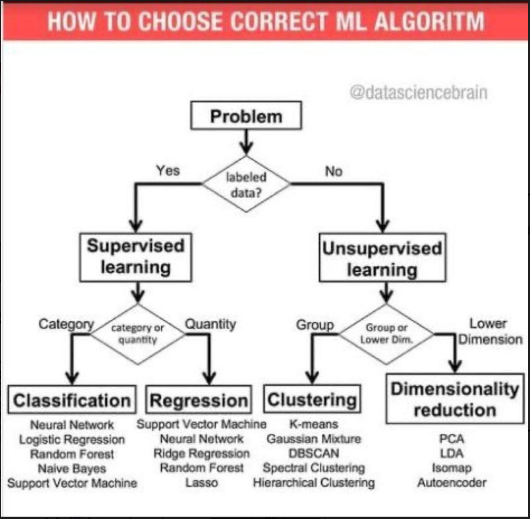 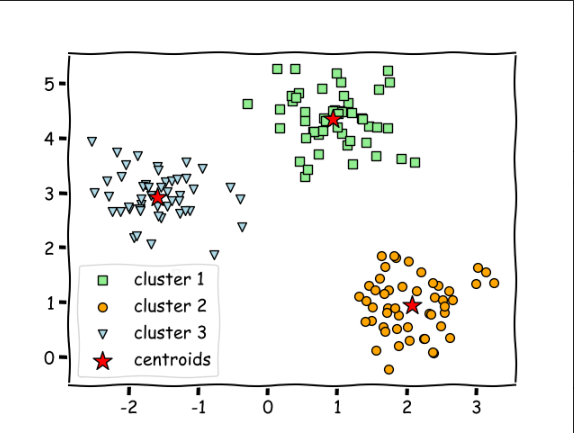 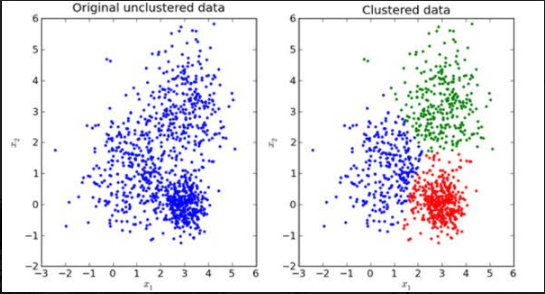

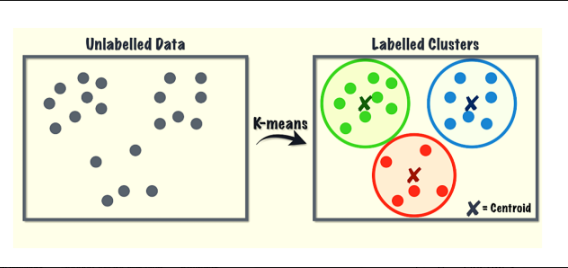 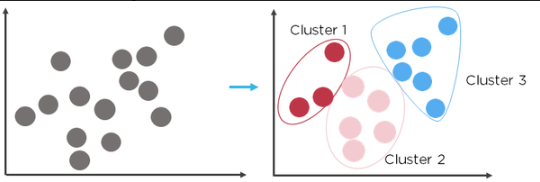 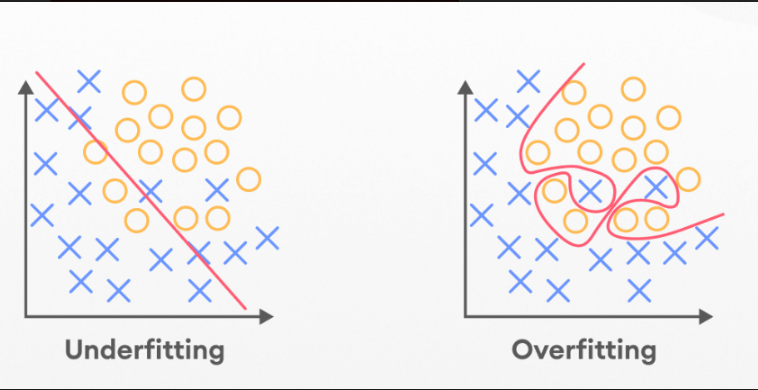



In [2]:
# Ejemplo de KNN con datos sencillos (unidimensionales, sólo 1 columna)
import numpy as np
train = np.array([[0.70436073, 0.91564351, 0.9931506, 2.26418779]])
train_1 = train.reshape(-1, 1) # https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
label = np.array([['1','1','1','0']])
label_1 = label.reshape(-1, 1)

print("train:", train)
print("train_1:", train_1)
print("label:", label)
print("label_1:", label_1)

train: [[0.70436073 0.91564351 0.9931506  2.26418779]]
train_1: [[0.70436073]
 [0.91564351]
 [0.9931506 ]
 [2.26418779]]
label: [['1' '1' '1' '0']]
label_1: [['1']
 ['1']
 ['1']
 ['0']]


***

## Ejercicio:

Averiguar qué hace .reshape(-1, 1) con un array de NumPy

***

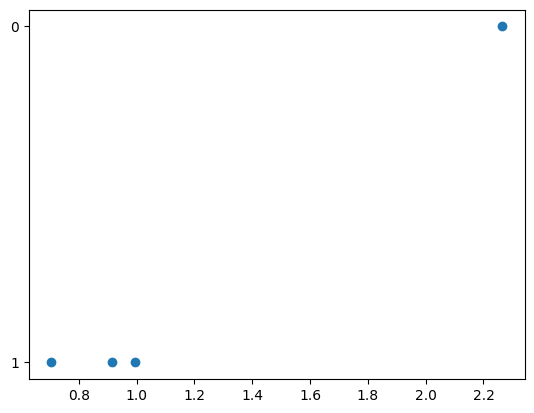

In [3]:
# Lo dibujamos
from matplotlib import pyplot as plt
plt.scatter(train[0], label[0])
plt.show()

Observamos que hay 3 puntos cerca de 1.0 y un punto alejado más allá de 2.2

Los 3 primeros están etiquetados con label = 1

El alejado está etiquetado con label = 0

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(train_1, label_1)

# Agregamos un nuevo punto también alejado, con intención de que lo identifique como label = 0
test = np.array([[0.70436073, 0.91564351, 0.9931506, 2.26418779, 2.5]])
test_1 = test.reshape(-1, 1)
predLabel = knn.predict(test_1)
print(predLabel)


['1' '1' '1' '0' '0']


/home/jips/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


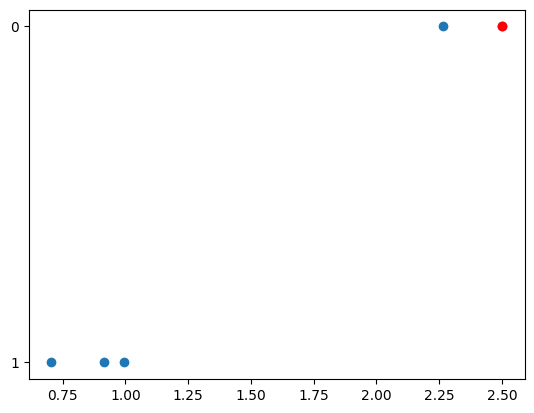

In [15]:
# Dibujamos la predicción (clasificación)
from matplotlib import pyplot as plt
plt.scatter(test[0], predLabel)
plt.scatter(test[0][-1:], predLabel[-1:], color="red") # pintamos el último de color rojo
plt.show()

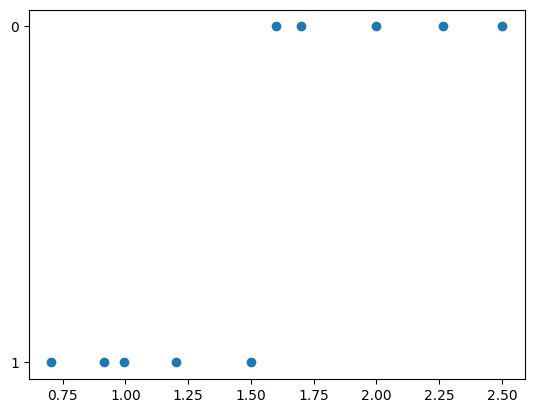

In [17]:
# Buscamos el punto donde cambia la predicción agregando datos intermedios de forma manual
test = np.array([[0.70436073, 0.91564351, 0.9931506, 2.26418779, 2.5, 2.0, 1.7, 1.6, 1.5, 1.2]])
test_1 = test.reshape(-1, 1)
predLabel = knn.predict(test_1)
plt.scatter(test[0], predLabel)
plt.show()

## ¿Cómo realiza KNN una predicción?

Una predicción de KNN necesita los datos de entrenamiento y la nueva observación para la cual quieres hacer una predicción:

- Primero, necesitarás tener un conjunto de datos de entrenamiento con etiquetas. Por ejemplo, digamos que tienes un conjunto de datos de dos características (x1 y x2) y dos clases (A y B).

- Luego, necesitarás tener una nueva observación para la cual quieres hacer una predicción. Esta observación también debería tener dos características (x1 y x2).

- A continuación, puedes calcular la distancia entre la nueva observación y cada una de las observaciones del conjunto de datos de entrenamiento utilizando una medida de distancia, como la distancia Euclidiana.

- Luego, puedes seleccionar los "k" vecinos más cercanos de la nueva observación (donde "k" es un número entero que especificas).

- Finalmente, puedes asignar una etiqueta a la nueva observación basándote en la mayoría de las etiquetas de los vecinos más cercanos. Por ejemplo, si la mayoría de los vecinos más cercanos tienen la etiqueta A, entonces puedes asignar la etiqueta A a la nueva observación.

## ¿Cómo se dibuja un resultado de KNN?

Para dibujar la predicción, puedes usar un gráfico de dispersión con dos ejes (x1 y x2) para representar las dos características. Luego, puedes dibujar las observaciones del conjunto de datos de entrenamiento y la nueva observación en el gráfico y usar diferentes colores o símbolos para representar las diferentes etiquetas. Por último, puedes dibujar un círculo alrededor de los "k" vecinos más cercanos para mostrar visualmente cómo se ha realizado la predicción.

***

#### Ejercicio:

Aplicar knn para detectar pisos de lujo

1. Crea un dataset de inmuebles que tú sepas que son de lujo (etiquetados con supervised learning)

2. Entrena KNN con ese dataset de test

3. Aplica predicción de KNN para obtener un indicador de qué pisos del dataset completo son de lujo y cuáles no

4. Dibuja los pisos de lujo en un scatter price/surface con color rojo

5. Dibuja los pisos económicos (los que no son de lujo) en el mismo scatter price/surface con color amarillo

***

In [8]:
# La misma librería nos permite encontrar los puntos vecinos o más cercanos a uno dado
from sklearn.neighbors import NearestNeighbors
neighbour = NearestNeighbors(n_neighbors = 2)
neighbour.fit(train_1)
print(neighbour.kneighbors([[1.5]]))

# distancia y elemento
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
#  it returns [[0.5]], and [[2]], which means that the element is at distance 0.5 and is the third element of samples (indexes start at 0).

(array([[0.5068494 , 0.58435649]]), array([[2, 1]]))


In [9]:
# Otro ejemplo
print(neighbour.kneighbors([[2.2]]))

(array([[0.06418779, 1.2068494 ]]), array([[3, 2]]))


***

## ¿Qué diferencia knn de k-means?

KNN (K Nearest Neighbors) y K-means son dos algoritmos de aprendizaje automático diferentes:

- Propósito: KNN es un algoritmo de **clasificación**, mientras que K-means es un algoritmo de **clustering**. Esto significa que KNN se utiliza para asignar una etiqueta a una nueva observación basándose en las etiquetas de sus "vecinos más cercanos", mientras que K-means se utiliza para dividir un conjunto de datos en "k" clusters basándose en las características de cada observación.

- Funcionamiento: KNN utiliza una medida de distancia (como la distancia Euclidiana) para determinar cuáles son los "k" vecinos más cercanos a una nueva observación. Luego, asigna una etiqueta a la observación basándose en la mayoría de las etiquetas de los vecinos más cercanos. K-means, por otro lado, asigna aleatoriamente a cada observación a uno de los "k" clusters y luego mueve la observación a otro cluster si esto hace que la suma de los cuadrados de las distancias a los centroides de los clusters sea mínima.

- Supervisión: KNN es un algoritmo supervisado, lo que significa que necesita etiquetas para entrenar el modelo. K-means, por otro lado, es un algoritmo no supervisado, lo que significa que no necesita etiquetas para entrenar el modelo.

- Escalabilidad: KNN tiende a ser menos escalable que K-means, ya que requiere calcular la distancia entre todas las observaciones en el conjunto de datos para cada nueva observación. K-means, por otro lado, es más escalable, ya que solo requiere actualizar los centroides de los clusters y asignar las observaciones a los clusters más cercanos.

***

### Métodos "non generalizing" o "instance-based"

Los métodos "non generalizing" o "instance-based" son términos utilizados en aprendizaje automático y son un enfoque para resolver problemas de clasificación y regresión. En este enfoque, el modelo aprende a resolver un problema al memorizar ejemplos previos y al compararlos con nuevas entradas para encontrar la mejor solución.

A diferencia de los métodos "generalizing", como la regresión lineal o la red neuronal, los métodos "Instance-based" no intentan entender las **relaciones subyacentes entre las características y la salida**, sino que simplemente almacenan y comparan los datos de entrenamiento para producir una salida. Este enfoque es útil en situaciones en las que no hay una relación clara entre las características y la salida, pero los datos de entrenamiento son muy específicos y detallados.

**K-means, por ejemplo, NO es un modelo de aprendizaje de tipo instance-based**. K-means es un algoritmo de clustering que se utiliza para agrupar datos en diferentes categorías o grupos. K-means no utiliza un enfoque de "instance-based" ya que no compara una entrada nueva con los datos de entrenamiento para predecir una salida, sino que utiliza un enfoque basado en **centroides**.

Los centroides son puntos en el espacio de los datos que representan el centro de un grupo o cluster de datos. En k-means, se inicializan k centroides al azar y luego se asignan los datos a los centroides más cercanos. Luego, los centroides se mueven a la media de los datos asignados a ellos y el proceso se repite hasta que los centroides se estabilicen. El resultado final es k grupos de datos con cada centroide representando el centro de un grupo.

***

#### Ejercicio:

Aplicar KNN para detectar patrones de tendencia en Bitcoin:

1. En un dataset de valoraciones de Bitcoin, obtener 5 columnas con el delta de los últimos 1, 2, 3, 4 y 5 días.

2. Buscar en la gráfica 3 fechas de clara tendencia alcista y 3 de bajista.

3. Crear un dataset de entrenamiento con las 6 fechas encontradas y las 5 columnas de deltas.

4. Entrenar KNN con este dataset de entrenamiento.

5. Aplica predicción de KNN para determinar la tendencia alcista/bajista en una fecha dada sobre el dataset completo.

6. Dibuja los valores alcistas de Bitcoin en color azul

7. Dibuja los valores bajistas de Bitcoin en color rojo

***

### Clasificación de patrones bursátiles

KNN permitiría realizar una búsqueda automática de patrones. Veamos qué patrones son los más habituales en series de tiempo de bolsa o crypto.

#### Cuñas en el análisis técnico de tipo chartista:

Una cuña es un patrón de gráfico que se forma cuando los precios tienen una tendencia a la alza o a la baja y se desplazan hacia arriba o hacia abajo en un patrón de convergencia. Esto se debe a que los máximos y mínimos de los precios van en aumento o en disminución a medida que el patrón avanza. Los chartistas utilizan las cuñas como un indicador de que la tendencia actual podría estar llegando a su fin y que podría producirse un cambio en la dirección del precio. Hay dos tipos de cuñas: la cuña alcista y la cuña bajista.

La **cuña alcista** se forma cuando los precios tienen una tendencia alcista y se desplazan hacia arriba en un patrón de convergencia. Esto se debe a que los máximos de los precios van en aumento a medida que el patrón avanza. Los chartistas utilizan la cuña alcista como un indicador de que la tendencia alcista podría estar llegando a su fin y que podría producirse un cambio en la dirección del precio hacia abajo.

La **cuña bajista** se forma cuando los precios tienen una tendencia a la baja y se desplazan hacia abajo en un patrón de convergencia. Esto se debe a que los mínimos de los precios van en disminución a medida que el patrón avanza. Los chartistas utilizan la cuña bajista como un indicador de que la tendencia bajista podría estar llegando a su fin y que podría producirse un cambio en la dirección del precio hacia arriba.


#### Patrones del análisis

Los patrones chartistas son formaciones en el gráfico de precios que pueden utilizarse para predecir la dirección futura del precio. Algunos de los patrones chartistas más comunes son:

- Cuña: Ya hemos visto dos tipos de cuñas: la cuña alcista y la cuña bajista.

- Martillo: se forma cuando el precio abre cerca del máximo del día y cierra cerca del mínimo, formando una "cola" hacia abajo. Se considera un patrón alcista.

- Hombre colgado: se forma cuando el precio abre cerca del mínimo del día y cierra cerca del máximo, formando una "cola" hacia arriba. Se considera un patrón bajista.

- Estrella fugaz: es un patrón alcista que se forma cuando el precio abre cerca del mínimo del día, alcanza un máximo intermedio y cierra cerca del precio de apertura.

- Estrella de la mañana: es un patrón bajista que se forma cuando el precio abre cerca del máximo del día, alcanza un mínimo intermedio y cierra cerca del precio de apertura.

- Doji: es un patrón de indecisión en el que el precio abre y cierra cerca del mismo nivel.

- Cabeza y hombros: es un patrón bajista que se forma cuando el precio alcanza un máximo, luego retrocede y vuelve a alcanzar ese máximo, y finalmente vuelve a retroceder de nuevo. Se considera un patrón de reversión a la baja.

- Hombros-cabeza-hombros: es un patrón alcista que se forma cuando el precio alcanza un mínimo, luego se recupera y vuelve a alcanzar ese mínimo, y finalmente vuelve a recuperarse de nuevo. Se considera un patrón de reversión al alza.

***

### Sazonalidad y Regresores Exógenos como patrón Bitcoin

Algunos factores que pueden influir en el precio de Bitcoin incluyen:

- Eventos políticos y económicos globales: noticias negativas sobre la economía global o eventos políticos inciertos pueden afectar la confianza en la moneda y, por lo tanto, su valor.

- Fechas clave (sazonalidad) en el calendario criptográfico: las fechas clave, como las reducciones a la mitad (**halving**) de la recompensa de bloque de Bitcoin, pueden tener un impacto significativo en su precio.

- Adopción y aceptación: la adopción y aceptación generalizadas de Bitcoin como forma de pago y reserva de valor pueden influir en su precio.

- Regulación gubernamental: las regulaciones gubernamentales y las leyes que afectan a las criptomonedas pueden influir en la demanda y, por lo tanto, en su precio.

En resumen, la sazonalidad y los regresores exógenos de Bitcoin es una combinación de factores económicos, políticos, tecnológicos y psicológicos, y puede ser impredecible.